
# Project Melbourne Housing

Project Description: Predict the Categorical Price of the buildings in Melbourne Australia based on their features.

Jose Ramirez

# Melbourne Housing Variables

- Rooms: Number of rooms
- Price: Price in dollars
- Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.
- Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.
- SellerG: Real Estate Agent
- Date: Date sold
- Distance: Distance from CBD
- Regionname: General Region (West, North West, North, North east …etc)
- Propertycount: Number of properties that exist in the suburb.
- Bedroom2 : Scraped # of Bedrooms (from different source)
- Bathroom: Number of Bathrooms
- Car: Number of carspots
- Landsize: Land Size
- BuildingArea: Building Size
- CouncilArea: Governing council for the area

# Import Libraries

In [1]:
import numpy as np
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [2]:
df=pd.read_csv(r'E:\FALL SEMESTER\Fundamentals of Data Analytics\Project\Project Python\Melbourne_housing_FULL.csv')

In [3]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

# Data Cleaning

- Delete the columns that are not requiered in the model.
- Delete the NaN values.
- Convert YearBuilt to AgeBuilding.
- Create dummy encoding for the columns Type, Method and RegionName

In [5]:
#Drop the unnecessary columns
df.drop(columns = {'Address','CouncilArea', 'Rooms', 'SellerG', 'Date', 'Propertycount', 'Suburb'}, axis = 1, inplace = True)

In [6]:
df.dropna(inplace=True)

In [7]:
# Convert YearBuilt to AgeBuilding
current_year = datetime.now().year
df['AgeBuilding'] = current_year-df['YearBuilt'].astype(int)

In [8]:
df.drop('YearBuilt', axis=1, inplace=True)

In [9]:
df

,Type,Price,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Regionname,AgeBuilding
2,h,1035000.0,S,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,-37.80790,144.99340,Northern Metropolitan,123
4,h,1465000.0,SP,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,-37.80930,144.99440,Northern Metropolitan,123
6,h,1600000.0,VB,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,-37.80720,144.99410,Northern Metropolitan,9
11,h,1876000.0,S,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,-37.80240,144.99930,Northern Metropolitan,113
14,h,1636000.0,S,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,-37.80600,144.99540,Northern Metropolitan,133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34847,h,500000.0,PI,25.5,3750.0,3.0,2.0,2.0,383.0,118.0,-37.61940,145.03951,Northern Metropolitan,7
34849,h,570000.0,SP,25.5,3750.0,3.0,2.0,2.0,404.0,158.0,-37.61031,145.03393,Northern Metropolitan,11
34853,h,888000.0,SP,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,-37.81551,144.88826,Western Metropolitan,5
34854,t,705000.0,S,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,-37.82286,144.87856,Western Metropolitan,23


Dummie Encoding of Categorical Variables

In [10]:
df = pd.get_dummies(df, columns=['Type'])

In [11]:
df = pd.get_dummies(df, columns=['Method'])

In [12]:
df = pd.get_dummies(df, columns=['Regionname'])

In [13]:
df.head()

,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,...,Method_SP,Method_VB,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,-37.8079,144.9934,...,0,0,0,0,1,0,0,0,0,0
4,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,-37.8093,144.9944,...,1,0,0,0,1,0,0,0,0,0
6,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,-37.8072,144.9941,...,0,1,0,0,1,0,0,0,0,0
11,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,-37.8024,144.9993,...,0,0,0,0,1,0,0,0,0,0
14,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,-37.8060,144.9954,...,0,0,0,0,1,0,0,0,0,0


In [14]:
df['NewPrice'] = df['Price']/1000

In [15]:
print(df)

           Price  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
2      1035000.0       2.5    3067.0       2.0       1.0  0.0     156.0   
4      1465000.0       2.5    3067.0       3.0       2.0  0.0     134.0   
6      1600000.0       2.5    3067.0       3.0       1.0  2.0     120.0   
11     1876000.0       2.5    3067.0       4.0       2.0  0.0     245.0   
14     1636000.0       2.5    3067.0       2.0       1.0  2.0     256.0   
...          ...       ...       ...       ...       ...  ...       ...   
34847   500000.0      25.5    3750.0       3.0       2.0  2.0     383.0   
34849   570000.0      25.5    3750.0       3.0       2.0  2.0     404.0   
34853   888000.0       6.3    3013.0       2.0       2.0  1.0      98.0   
34854   705000.0       6.3    3013.0       2.0       1.0  2.0     220.0   
34856  1020000.0       6.3    3013.0       2.0       1.0  0.0     250.0   

       BuildingArea  Lattitude  Longtitude  ...  Method_VB  \
2              79.0  -37.80790   144.

In [16]:
df.drop('Price', axis=1, inplace=True)

In [17]:
df['NewPrice'].describe()

count    8887.000000
mean     1092.901629
std       679.381904
min       131.000000
25%       641.000000
50%       900.000000
75%      1345.000000
max      9000.000000
Name: NewPrice, dtype: float64

In [18]:
# Define bins and labels for the price categories
#Bins were defined based on Q1 (25%) and Q3 (75%)
bins = [0,641,1345, float('inf')]  # specify the bin edges of the Prices
labels = ['Low', 'Medium','High']  # specify labels for each Price category

In [19]:
# Create a new column 'Price_Category' with the categorical values
df['Price_Category'] = pd.cut(df['NewPrice'], bins=bins, labels=labels, right=False)

In [20]:
df.drop('NewPrice', axis=1, inplace=True)
print(df)

       Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  BuildingArea  \
2           2.5    3067.0       2.0       1.0  0.0     156.0          79.0   
4           2.5    3067.0       3.0       2.0  0.0     134.0         150.0   
6           2.5    3067.0       3.0       1.0  2.0     120.0         142.0   
11          2.5    3067.0       4.0       2.0  0.0     245.0         210.0   
14          2.5    3067.0       2.0       1.0  2.0     256.0         107.0   
...         ...       ...       ...       ...  ...       ...           ...   
34847      25.5    3750.0       3.0       2.0  2.0     383.0         118.0   
34849      25.5    3750.0       3.0       2.0  2.0     404.0         158.0   
34853       6.3    3013.0       2.0       2.0  1.0      98.0         104.0   
34854       6.3    3013.0       2.0       1.0  2.0     220.0         120.0   
34856       6.3    3013.0       2.0       1.0  0.0     250.0         103.0   

       Lattitude  Longtitude  AgeBuilding  ...  Method_VB  \
2 

Export dataframe into the file modified_Classification_Dataset.csv

In [21]:
df.to_csv('modified_Classification_Dataset.csv', index = False)

# Exploratory Data Analysis (EDA)

In [22]:
df.describe()

,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,AgeBuilding,...,Method_SP,Method_VB,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
count,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,...,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000
mean,11.199887,3111.662653,3.078204,1.646450,1.692247,523.480365,149.309477,-37.804501,144.991393,57.246652,...,0.145381,0.095195,0.110498,0.005739,0.293912,0.006976,0.041746,0.304602,0.231687,0.004839
std,6.813402,112.614268,0.966269,0.721611,0.975464,1061.324228,87.925580,0.090549,0.118919,37.040876,...,0.352504,0.293501,0.313528,0.075541,0.455578,0.083238,0.200020,0.460265,0.421934,0.069395
min,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-38.174360,144.423790,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.400000,3044.000000,2.000000,1.000000,1.000000,212.000000,100.000000,-37.858560,144.920000,23.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.200000,3084.000000,3.000000,2.000000,2.000000,478.000000,132.000000,-37.798700,144.998500,53.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,13.900000,3150.000000,4.000000,2.000000,2.000000,652.000000,180.000000,-37.748945,145.064560,78.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,47.400000,3977.000000,12.000000,9.000000,10.000000,42800.000000,3112.000000,-37.407200,145.526350,827.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<AxesSubplot:title={'center':'Distance'}>,
        <AxesSubplot:title={'center':'Postcode'}>,
        <AxesSubplot:title={'center':'Bedroom2'}>,
        <AxesSubplot:title={'center':'Bathroom'}>,
        <AxesSubplot:title={'center':'Car'}>],
       [<AxesSubplot:title={'center':'Landsize'}>,
        <AxesSubplot:title={'center':'BuildingArea'}>,
        <AxesSubplot:title={'center':'Lattitude'}>,
        <AxesSubplot:title={'center':'Longtitude'}>,
        <AxesSubplot:title={'center':'AgeBuilding'}>],
       [<AxesSubplot:title={'center':'Type_h'}>,
        <AxesSubplot:title={'center':'Type_t'}>,
        <AxesSubplot:title={'center':'Type_u'}>,
        <AxesSubplot:title={'center':'Method_PI'}>,
        <AxesSubplot:title={'center':'Method_S'}>],
       [<AxesSubplot:title={'center':'Method_SA'}>,
        <AxesSubplot:title={'center':'Method_SP'}>,
        <AxesSubplot:title={'center':'Method_VB'}>,
        <AxesSubplot:title={'center':'Regionname_Eastern Metropolitan'}>,
  

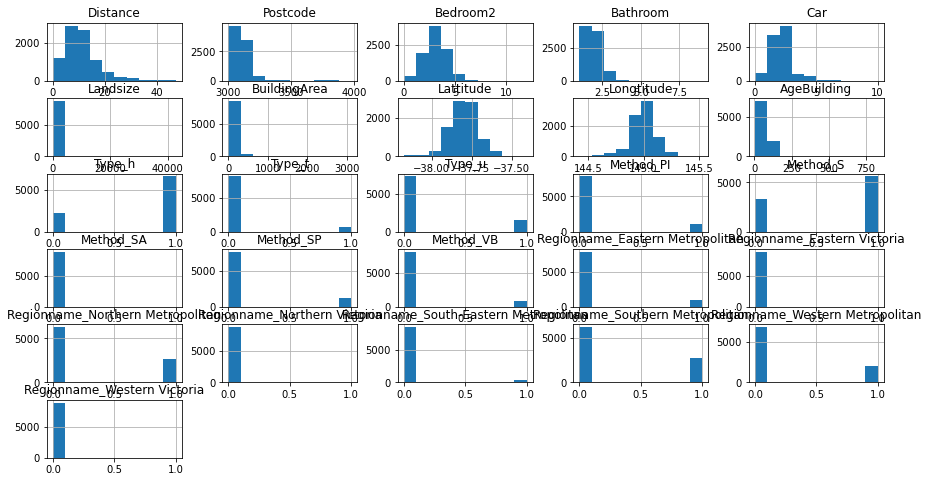

In [23]:
df.hist(figsize=(15, 8))

## Normalization and Feature Scaling

In [24]:
df['Distance'] = np.log(df['Distance'] + 1)
df['Postcode'] = np.log(df['Postcode'] + 1)
df['Landsize'] = np.log(df['Landsize'] + 1)
df['BuildingArea'] = np.log(df['BuildingArea'] + 1)

array([[<AxesSubplot:title={'center':'Distance'}>,
        <AxesSubplot:title={'center':'Postcode'}>,
        <AxesSubplot:title={'center':'Bedroom2'}>,
        <AxesSubplot:title={'center':'Bathroom'}>,
        <AxesSubplot:title={'center':'Car'}>],
       [<AxesSubplot:title={'center':'Landsize'}>,
        <AxesSubplot:title={'center':'BuildingArea'}>,
        <AxesSubplot:title={'center':'Lattitude'}>,
        <AxesSubplot:title={'center':'Longtitude'}>,
        <AxesSubplot:title={'center':'AgeBuilding'}>],
       [<AxesSubplot:title={'center':'Type_h'}>,
        <AxesSubplot:title={'center':'Type_t'}>,
        <AxesSubplot:title={'center':'Type_u'}>,
        <AxesSubplot:title={'center':'Method_PI'}>,
        <AxesSubplot:title={'center':'Method_S'}>],
       [<AxesSubplot:title={'center':'Method_SA'}>,
        <AxesSubplot:title={'center':'Method_SP'}>,
        <AxesSubplot:title={'center':'Method_VB'}>,
        <AxesSubplot:title={'center':'Regionname_Eastern Metropolitan'}>,
  

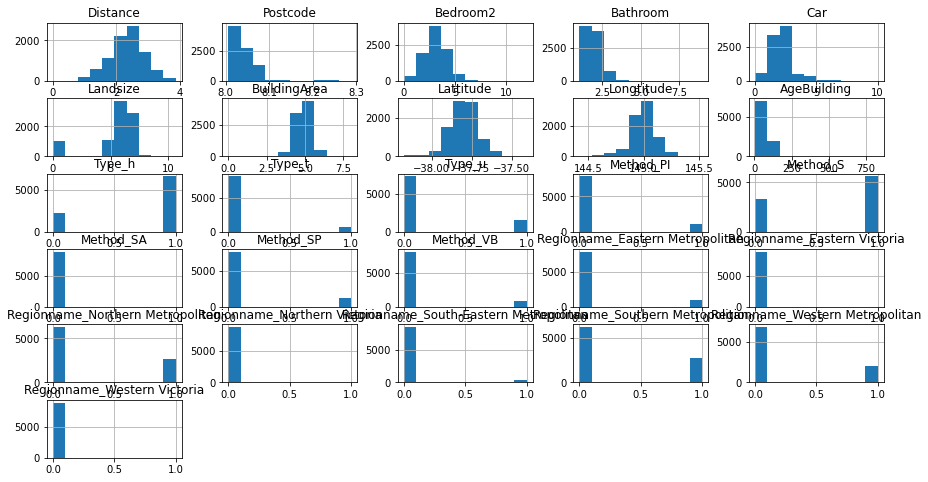

In [25]:
df.hist(figsize=(15, 8))

In [26]:
# Load data
X = df.drop("Price_Category",axis=1)
y = df["Price_Category"]

In [27]:
#Feature scaling using MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(X)

## Train and Test

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(housing_num_min_max_scaled, y, test_size=0.2, random_state=42)

# Naive Bayes

In [30]:
# Load libraries
from sklearn.naive_bayes import GaussianNB

In [31]:
# Create Gaussian naive Bayes object
classifer = GaussianNB()

In [32]:
# Train model
model_nb = classifer.fit(housing_num_min_max_scaled, y)

In [33]:
preds = model_nb.predict(X_test)

### Model Evaluation Naive Bayes

In [34]:
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from sklearn.metrics import plot_confusion_matrix

In [35]:
confusion_matrix(y_test,preds)

array([[430,   1,  13],
       [150, 251,  55],
       [647, 110, 121]], dtype=int64)

In [36]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

        High       0.35      0.97      0.51       444
         Low       0.69      0.55      0.61       456
      Medium       0.64      0.14      0.23       878

    accuracy                           0.45      1778
   macro avg       0.56      0.55      0.45      1778
weighted avg       0.58      0.45      0.40      1778



In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

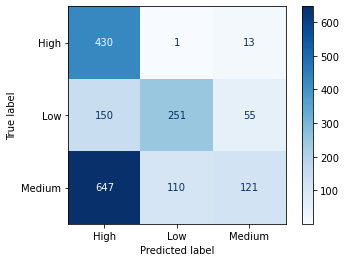

In [37]:
plot_confusion_matrix(conf_matrix, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

# Random Forest Classification

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
model_rfc = RandomForestClassifier(n_estimators=100,bootstrap=True, oob_score= False, max_features='auto',random_state=42)

In [40]:
model_rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [41]:
preds = model_rfc.predict(X_test)

### Model Evaluation Random Forest Classifier

In [42]:
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from sklearn.metrics import plot_confusion_matrix

In [43]:
confusion_matrix(y_test,preds)

array([[361,   0,  83],
       [  0, 378,  78],
       [ 55,  60, 763]], dtype=int64)

In [44]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

        High       0.87      0.81      0.84       444
         Low       0.86      0.83      0.85       456
      Medium       0.83      0.87      0.85       878

    accuracy                           0.84      1778
   macro avg       0.85      0.84      0.84      1778
weighted avg       0.85      0.84      0.84      1778



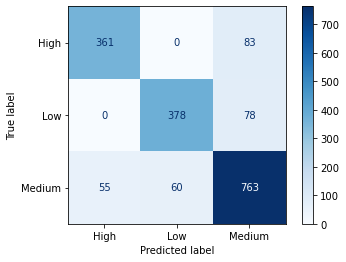

In [45]:
plot_confusion_matrix(model_rfc, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

# Features Importance

In [46]:
model_rfc.feature_importances_

array([0.10026569, 0.07615191, 0.04490307, 0.03235083, 0.02308993,
       0.08570111, 0.16577212, 0.11773237, 0.10646358, 0.07840434,
       0.02778791, 0.00586409, 0.04169973, 0.00605668, 0.00887604,
       0.0008597 , 0.00539584, 0.00484386, 0.00510563, 0.00071744,
       0.00645725, 0.00056773, 0.00329337, 0.04363797, 0.0075058 ,
       0.000496  ])

In [47]:
feature_names = df.columns.tolist()
print(feature_names)

['Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Lattitude', 'Longtitude', 'AgeBuilding', 'Type_h', 'Type_t', 'Type_u', 'Method_PI', 'Method_S', 'Method_SA', 'Method_SP', 'Method_VB', 'Regionname_Eastern Metropolitan', 'Regionname_Eastern Victoria', 'Regionname_Northern Metropolitan', 'Regionname_Northern Victoria', 'Regionname_South-Eastern Metropolitan', 'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan', 'Regionname_Western Victoria', 'Price_Category']


In [48]:
# Get feature importances
importances = model_rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in model_rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

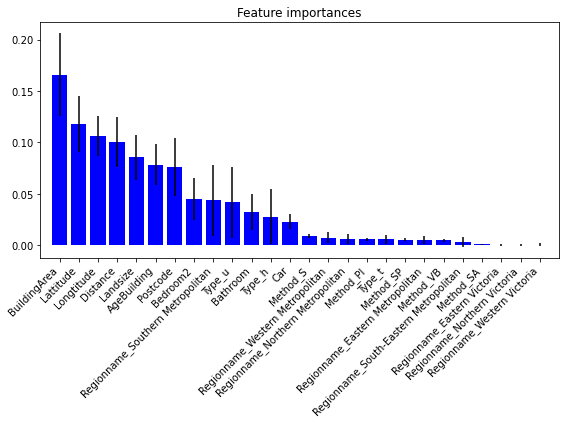

In [49]:
# Plot feature importances with names
plt.figure(figsize=(8, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="b", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45, ha='right')  # Feature names added
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

# Choosing correct number of trees

In [50]:
test_error = []

for n in range(1,40):
    # Use n random trees
    model = RandomForestClassifier(n_estimators=n,bootstrap=True, oob_score= False, max_features='auto')
    model.fit(X_train,y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))

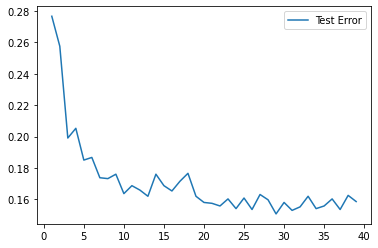

In [51]:
plt.plot(range(1,40),test_error,label='Test Error')
plt.legend()